In [ ]:
#import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import urllib.parse
import networkx as nx

In [ ]:
df_accidents_2018 = pd.read_json("https://data.sfgov.org/resource/ubvf-ztfx.json?accident_year=2018&$limit=50000")
df_accidents_2018

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,vz_pcf_link,party2_type,party2_dir_of_travel,party2_move_pre_acc,party_at_fault
0,27187,30734000,8742101.0,180957642,37.789275,-122.401315,SFPD-INTERIM DB,CITY STREET,2018-12-20T16:37:00.000,2018-12-20T00:00:00.000,...,2023-04-07,2024-10-03 13:51:28.790,Financial District/South Beach,6.0,SOUTHERN,NaN,NaN,NaN,NaN,NaN
1,18115,25876000,4007000.0,180168667,37.768971,-122.429082,SFPD-INTERIM DB,CITY STREET,2018-03-04T13:25:00.000,2018-03-04T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Castro/Upper Market,8.0,NORTHERN,Not Stated,NaN,NaN,NaN,NaN
2,15846,24311000,406000.0,180246031,37.777348,-122.413020,SFPD-INTERIM DB,CITY STREET,2018-04-03T10:09:00.000,2018-04-03T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,South of Market,6.0,SOUTHERN,Not Stated,Bicyclist,South,Proceeding Straight,NaN
3,39327,33576000,445000.0,180405306,37.747208,-122.466790,SFPD-INTERIM DB,CITY STREET,2018-05-31T13:53:00.000,2018-05-31T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,West of Twin Peaks,7.0,TARAVAL,Not Stated,NaN,NaN,NaN,NaN
4,13682,24349000,5685000.0,180480790,37.770016,-122.415428,SFPD-INTERIM DB,CITY STREET,2018-06-28T13:00:00.000,2018-06-28T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Mission,6.0,SOUTHERN,Not Stated,Driver,South,Making Right Turn,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,8415,23953000,10672000.0,180021009,37.752495,-122.406290,SFPD-INTERIM DB,CITY STREET,2018-01-01T17:51:00.000,2018-01-01T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Mission,9.0,MISSION,http://leginfo.legislature.ca.gov/faces/codes_...,Driver,South,Proceeding Straight,1.0
3303,6103,23633000,NaN,180977418,37.749746,-122.396274,SFPD-INTERIM DB,CITY STREET,2018-12-28T15:45:00.000,2018-12-28T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Bayview Hunters Point,10.0,BAYVIEW,http://leginfo.legislature.ca.gov/faces/codes_...,Pedestrian,Not Stated,Proceeding Straight,1.0
3304,3096,20188000,7072000.0,180195080,37.733809,-122.382426,SFPD-INTERIM DB,CITY STREET,2018-03-14T17:58:00.000,2018-03-14T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Bayview Hunters Point,10.0,BAYVIEW,http://leginfo.legislature.ca.gov/faces/codes_...,NaN,NaN,NaN,1.0
3305,3364,20660000,NaN,180328532,37.735591,-122.390416,SFPD-INTERIM DB,CITY STREET,2018-05-03T15:21:00.000,2018-05-03T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Bayview Hunters Point,10.0,BAYVIEW,http://leginfo.legislature.ca.gov/faces/codes_...,NaN,NaN,NaN,1.0


In [ ]:
#API limitations so pull twice
df_accidents_2023 = pd.read_json("https://data.sfgov.org/resource/ubvf-ztfx.json?accident_year=2023&$limit=50000")
df_accidents_2023

,unique_id,cnn_intrsctn_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,cnn_sgmt_fkey,vz_pcf_code,vz_pcf_group,vz_pcf_link,party_at_fault
0,74803,24545000.0,230607400,37.790827,-122.390012,SFPD-INTERIM DB,CITY STREET,2023-08-25T17:06:00.000,2023-08-25T00:00:00.000,2024-10-14 17:06:00,...,2024-10-02,2024-10-03 13:51:28.790,Financial District/South Beach,6.0,SOUTHERN,NaN,NaN,NaN,NaN,NaN
1,74816,24262000.0,230603088,37.776746,-122.407842,SFPD-INTERIM DB,CITY STREET,2023-08-24T10:46:00.000,2023-08-24T00:00:00.000,2024-10-14 10:46:00,...,2024-10-02,2024-10-03 13:51:28.790,South of Market,6.0,SOUTHERN,NaN,NaN,NaN,NaN,NaN
2,74628,30753000.0,230104042,37.773036,-122.421941,SFPD-INTERIM DB,CITY STREET,2023-02-12T10:00:00.000,2023-02-12T00:00:00.000,2024-10-14 10:00:00,...,2024-10-02,2024-10-03 13:51:28.790,Hayes Valley,6.0,SOUTHERN,NaN,NaN,NaN,NaN,NaN
3,74499,24995000.0,230330140,37.794052,-122.407965,SFPD-INTERIM DB,CITY STREET,2023-05-12T14:10:00.000,2023-05-12T00:00:00.000,2024-10-14 14:10:00,...,2024-10-02,2024-10-03 13:51:28.790,Chinatown,3.0,CENTRAL,4092000.0,NaN,NaN,NaN,NaN
4,74325,24760000.0,230252641,37.797505,-122.402041,SFPD-INTERIM DB,CITY STREET,2023-04-11T21:24:00.000,2023-04-11T00:00:00.000,2024-10-14 21:24:00,...,2024-10-02,2024-10-03 13:51:28.790,Chinatown,3.0,CENTRAL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,74922,23651000.0,230716493,37.764247,-122.390066,SFPD-INTERIM DB,CITY STREET,2023-10-05T18:14:00.000,2023-10-05T00:00:00.000,2024-10-14 18:14:00,...,2024-10-02,2024-10-03 13:51:28.790,Potrero Hill,6.0,BAYVIEW,8714000.0,21802(a),"21802(a,b)",http://leginfo.legislature.ca.gov/faces/codes_...,NaN
2922,75038,25139000.0,230636459,37.785026,-122.414505,SFPD-INTERIM DB,CITY STREET,2023-09-05T23:11:00.000,2023-09-05T00:00:00.000,2024-10-14 23:11:00,...,2024-04-19,2024-10-03 13:51:28.790,Tenderloin,5.0,TENDERLOIN,8242000.0,Unknown,Unknown,Not Stated,NaN
2923,74893,26049000.0,230716421,37.781151,-122.433959,SFPD-INTERIM DB,CITY STREET,2023-10-05T17:51:00.000,2023-10-05T00:00:00.000,2024-10-14 17:51:00,...,2024-10-02,2024-10-03 13:51:28.790,Western Addition,5.0,NORTHERN,12130000.0,NaN,NaN,NaN,NaN
2924,74933,26340000.0,230753542,37.770424,-122.443666,SFPD-INTERIM DB,CITY STREET,2023-10-20T15:06:00.000,2023-10-20T00:00:00.000,2024-10-14 15:06:00,...,2024-10-02,2024-10-03 13:51:28.790,Haight Ashbury,5.0,PARK,6617000.0,21755(a),21755(a),http://leginfo.legislature.ca.gov/faces/codes_...,1.0


In [ ]:
df_accidents = pd.concat([df_accidents_2018, df_accidents_2023], ignore_index=True)
df_accidents

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,vz_pcf_link,party2_type,party2_dir_of_travel,party2_move_pre_acc,party_at_fault
0,27187,30734000.0,8742101.0,180957642,37.789275,-122.401315,SFPD-INTERIM DB,CITY STREET,2018-12-20T16:37:00.000,2018-12-20T00:00:00.000,...,2023-04-07,2024-10-03 13:51:28.790,Financial District/South Beach,6.0,SOUTHERN,NaN,NaN,NaN,NaN,NaN
1,18115,25876000.0,4007000.0,180168667,37.768971,-122.429082,SFPD-INTERIM DB,CITY STREET,2018-03-04T13:25:00.000,2018-03-04T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Castro/Upper Market,8.0,NORTHERN,Not Stated,NaN,NaN,NaN,NaN
2,15846,24311000.0,406000.0,180246031,37.777348,-122.413020,SFPD-INTERIM DB,CITY STREET,2018-04-03T10:09:00.000,2018-04-03T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,South of Market,6.0,SOUTHERN,Not Stated,Bicyclist,South,Proceeding Straight,NaN
3,39327,33576000.0,445000.0,180405306,37.747208,-122.466790,SFPD-INTERIM DB,CITY STREET,2018-05-31T13:53:00.000,2018-05-31T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,West of Twin Peaks,7.0,TARAVAL,Not Stated,NaN,NaN,NaN,NaN
4,13682,24349000.0,5685000.0,180480790,37.770016,-122.415428,SFPD-INTERIM DB,CITY STREET,2018-06-28T13:00:00.000,2018-06-28T00:00:00.000,...,2023-04-26,2024-10-03 13:51:28.790,Mission,6.0,SOUTHERN,Not Stated,Driver,South,Making Right Turn,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,74922,23651000.0,8714000.0,230716493,37.764247,-122.390066,SFPD-INTERIM DB,CITY STREET,2023-10-05T18:14:00.000,2023-10-05T00:00:00.000,...,2024-10-02,2024-10-03 13:51:28.790,Potrero Hill,6.0,BAYVIEW,http://leginfo.legislature.ca.gov/faces/codes_...,Driver,West,Proceeding Straight,NaN
6229,75038,25139000.0,8242000.0,230636459,37.785026,-122.414505,SFPD-INTERIM DB,CITY STREET,2023-09-05T23:11:00.000,2023-09-05T00:00:00.000,...,2024-04-19,2024-10-03 13:51:28.790,Tenderloin,5.0,TENDERLOIN,Not Stated,Parked Vehicle,Not Stated,Not Stated,NaN
6230,74893,26049000.0,12130000.0,230716421,37.781151,-122.433959,SFPD-INTERIM DB,CITY STREET,2023-10-05T17:51:00.000,2023-10-05T00:00:00.000,...,2024-10-02,2024-10-03 13:51:28.790,Western Addition,5.0,NORTHERN,NaN,Driver,South,Proceeding Straight,NaN
6231,74933,26340000.0,6617000.0,230753542,37.770424,-122.443666,SFPD-INTERIM DB,CITY STREET,2023-10-20T15:06:00.000,2023-10-20T00:00:00.000,...,2024-10-02,2024-10-03 13:51:28.790,Haight Ashbury,5.0,PARK,http://leginfo.legislature.ca.gov/faces/codes_...,Driver,West,Making Right Turn,1.0


In [ ]:
df_accidents_subset = df_accidents[['lighting', 'accident_year', 'type_of_collision', 'collision_severity', 'dph_col_grp_description', 'road_cond_1', 'party1_move_pre_acc']]
df_accidents_subset


,lighting,accident_year,type_of_collision,collision_severity,dph_col_grp_description,road_cond_1,party1_move_pre_acc
0,Daylight,2018,Overturned,Injury (Other Visible),Bicycle Only,No Unusual Condition,Proceeding Straight
1,Daylight,2018,Other,Injury (Other Visible),Bicycle Only,No Unusual Condition,Other
2,Daylight,2018,Sideswipe,Injury (Other Visible),Bicycle Only,No Unusual Condition,Proceeding Straight
3,Daylight,2018,Other,Injury (Severe),Bicycle Only,No Unusual Condition,Proceeding Straight
4,Daylight,2018,Head-On,Injury (Complaint of Pain),Vehicle(s) Only Involved,No Unusual Condition,Passing Other Vehicle
...,...,...,...,...,...,...,...
6228,Daylight,2023,Broadside,Injury (Other Visible),Vehicle(s) Only Involved,No Unusual Condition,Making Left Turn
6229,Not Stated,2023,Not Stated,Injury (Other Visible),Vehicle(s) Only Involved,Not Stated,Not Stated
6230,Daylight,2023,Vehicle/Pedestrian,Injury (Other Visible),Vehicle-Pedestrian,No Unusual Condition,Proceeding Straight
6231,Daylight,2023,Broadside,Injury (Other Visible),Vehicle(s) Only Involved,No Unusual Condition,Proceeding Straight


In [ ]:
# prompt: Using dataframe df_accidents_subset: filter for values where dph_col_grp_description contains "Vehicle(s) Only Involved" or "Vehicle-Pedestrian"

# Filter the dataframe for rows where dph_col_grp_description contains "Vehicle(s) Only Involved" or "Vehicle-Pedestrian".
filtered_df = df_accidents_subset[
    df_accidents_subset['dph_col_grp_description'].str.contains(
        "Pedestrian", na=False
    )
]

# |Vehicle-Pedestrian

filtered_df

,lighting,accident_year,type_of_collision,collision_severity,dph_col_grp_description,road_cond_1,party1_move_pre_acc
7,Daylight,2018,Vehicle/Pedestrian,Injury (Complaint of Pain),Vehicle-Pedestrian,No Unusual Condition,Other
8,Daylight,2018,Vehicle/Pedestrian,Fatal,Vehicle-Pedestrian,Construction or Repair Zone,Stopped In Road
12,Daylight,2018,Vehicle/Pedestrian,Injury (Complaint of Pain),Vehicle-Pedestrian,No Unusual Condition,Other
30,Dark - Street Lights,2018,Vehicle/Pedestrian,Injury (Other Visible),Vehicle-Pedestrian,No Unusual Condition,Proceeding Straight
39,Daylight,2018,Vehicle/Pedestrian,Injury (Other Visible),Vehicle-Pedestrian,No Unusual Condition,Entering Traffic
...,...,...,...,...,...,...,...
6191,Daylight,2023,Vehicle/Pedestrian,Injury (Complaint of Pain),Vehicle-Pedestrian,No Unusual Condition,Backing
6194,Dark - Street Lights,2023,Vehicle/Pedestrian,Injury (Other Visible),Vehicle-Pedestrian,No Unusual Condition,Other
6195,Dark - Street Lights,2023,Vehicle/Pedestrian,Injury (Complaint of Pain),Vehicle-Pedestrian,No Unusual Condition,Proceeding Straight
6211,Daylight,2023,Vehicle/Pedestrian,Injury (Other Visible),Vehicle-Pedestrian,No Unusual Condition,Parking Maneuver


In [ ]:
# Create a directed graph
graph = nx.DiGraph()

# Define the relationships
relationships = [
    ('lighting', 'type_of_collision'),
    ('type_of_collision', 'collision_severity'),
    ('dph_col_grp_description', 'type_of_collision'),
    ('road_cond_1', 'type_of_collision'),
    ('road_cond_1', 'party1_move_pre_acc')
]

# Add edges to the graph
for source, target in relationships:
  if source in df_accidents.columns and target in df_accidents.columns:
    graph.add_edge(source, target)

# Print the graph's nodes and edges (optional)
print("Nodes:", graph.nodes())
print("Edges:", graph.edges())


Nodes: ['lighting', 'type_of_collision', 'collision_severity', 'dph_col_grp_description', 'road_cond_1', 'party1_move_pre_acc']
Edges: [('lighting', 'type_of_collision'), ('type_of_collision', 'collision_severity'), ('dph_col_grp_description', 'type_of_collision'), ('road_cond_1', 'type_of_collision'), ('road_cond_1', 'party1_move_pre_acc')]


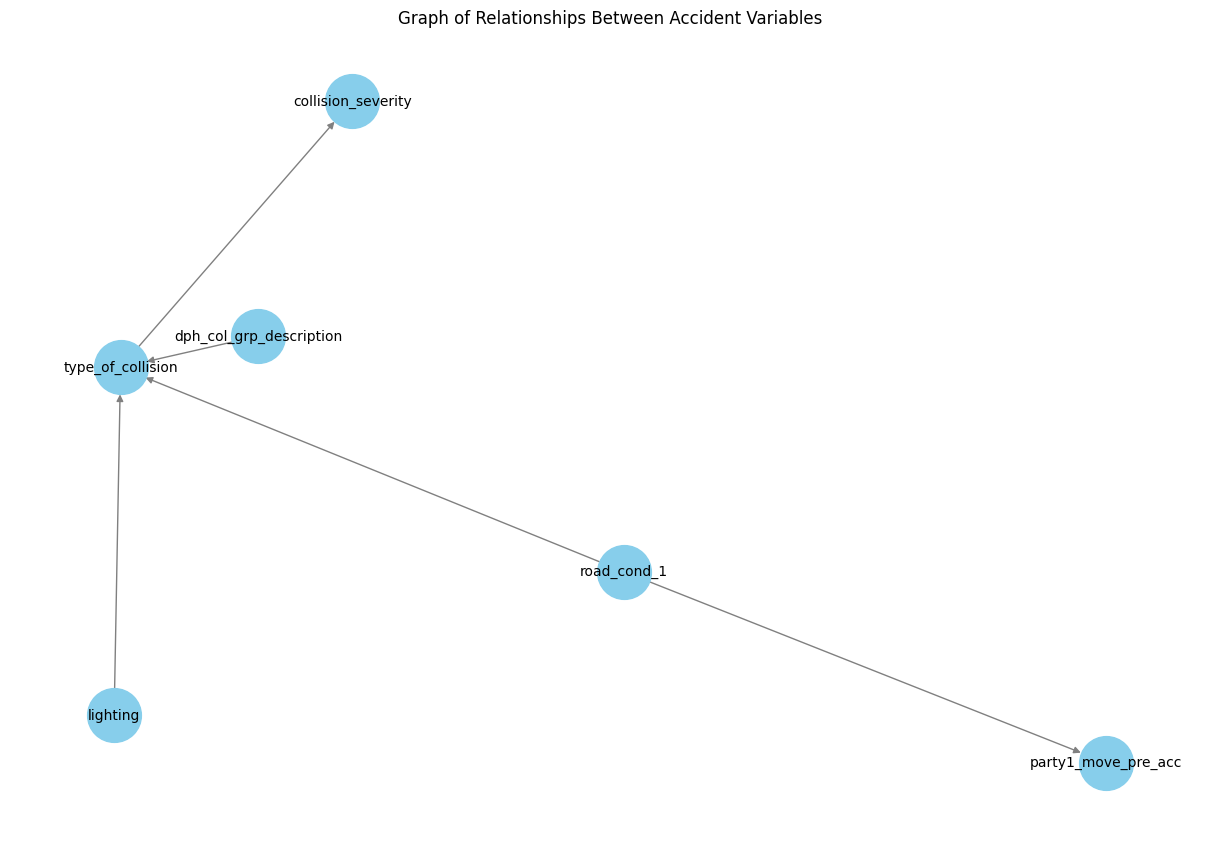

In [ ]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)  # You can try different layout algorithms
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', font_size=10)
plt.title("Graph of Relationships Between Accident Variables")
plt.show()


In [ ]:
!pip install dowhy
import dowhy
from dowhy import gcm
causal_model = gcm.StructuralCausalModel(graph)

In [ ]:
gcm.auto.assign_causal_mechanisms(causal_model, filtered_df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
gcm.fit(causal_model, filtered_df)

Fitting causal mechanism of node party1_move_pre_acc: 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]


In [ ]:
auto_assignment_summary = gcm.auto.assign_causal_mechanisms(causal_model, filtered_df)
print(auto_assignment_summary)

When using this auto assignment function, the given data is used to automatically assign a causal mechanism to each node. Note that causal mechanisms can also be customized and assigned manually.
The following types of causal mechanisms are considered for the automatic selection:

If root node:
An empirical distribution, i.e., the distribution is represented by randomly sampling from the provided data. This provides a flexible and non-parametric way to model the marginal distribution and is valid for all types of data modalities.

If non-root node and the data is continuous:
Additive Noise Models (ANM) of the form X_i = f(PA_i) + N_i, where PA_i are the parents of X_i and the unobserved noise N_i is assumed to be independent of PA_i.To select the best model for f, different regression models are evaluated and the model with the smallest mean squared error is selected.Note that minimizing the mean squared error here is equivalent to selecting the best choice of an ANM.

If non-root node

Test permutations of given graph: 100%|██████████| 50/50 [00:25<00:00,  1.94it/s]


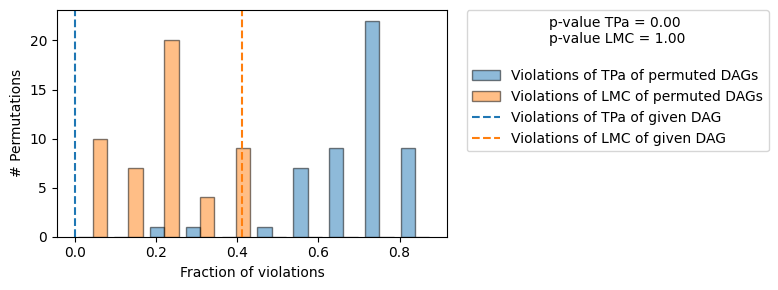

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [ ]:
print(gcm.evaluate_causal_model(causal_model, filtered_df))

In [ ]:
samples = gcm.interventional_samples(causal_model,
                                     {'type_of_collision': lambda y: 'Sideswipe' },
                                     num_samples_to_draw=1000)
print(samples)

                 lighting dph_col_grp_description           road_cond_1  \
0                Daylight      Vehicle-Pedestrian  No Unusual Condition   
1                Daylight      Vehicle-Pedestrian  No Unusual Condition   
2                Daylight      Vehicle-Pedestrian  No Unusual Condition   
3                Daylight      Vehicle-Pedestrian  No Unusual Condition   
4                Daylight      Vehicle-Pedestrian  No Unusual Condition   
..                    ...                     ...                   ...   
995              Daylight      Vehicle-Pedestrian  No Unusual Condition   
996              Daylight      Bicycle-Pedestrian  No Unusual Condition   
997  Dark - Street Lights      Vehicle-Pedestrian  No Unusual Condition   
998              Daylight      Vehicle-Pedestrian  No Unusual Condition   
999              Daylight      Vehicle-Pedestrian  No Unusual Condition   

    type_of_collision  party1_move_pre_acc          collision_severity  
0           Sideswipe  Pro

In [ ]:
import numpy as np

# Note: The percentage conversion only makes sense for purely positive attributions.
def convert_to_percentage(value_dictionary):
    total_absolute_sum = np.sum([abs(v) for v in value_dictionary.values()])
    return {k: abs(v) / total_absolute_sum * 100 for k, v in value_dictionary.items()}


arrow_strengths = gcm.arrow_strength(causal_model, target_node='type_of_collision')

In [ ]:
print(arrow_strengths)

{('dph_col_grp_description', 'type_of_collision'): 0.030315296984159818, ('lighting', 'type_of_collision'): 0.040780313750619496, ('road_cond_1', 'type_of_collision'): 0.024214964102967067}


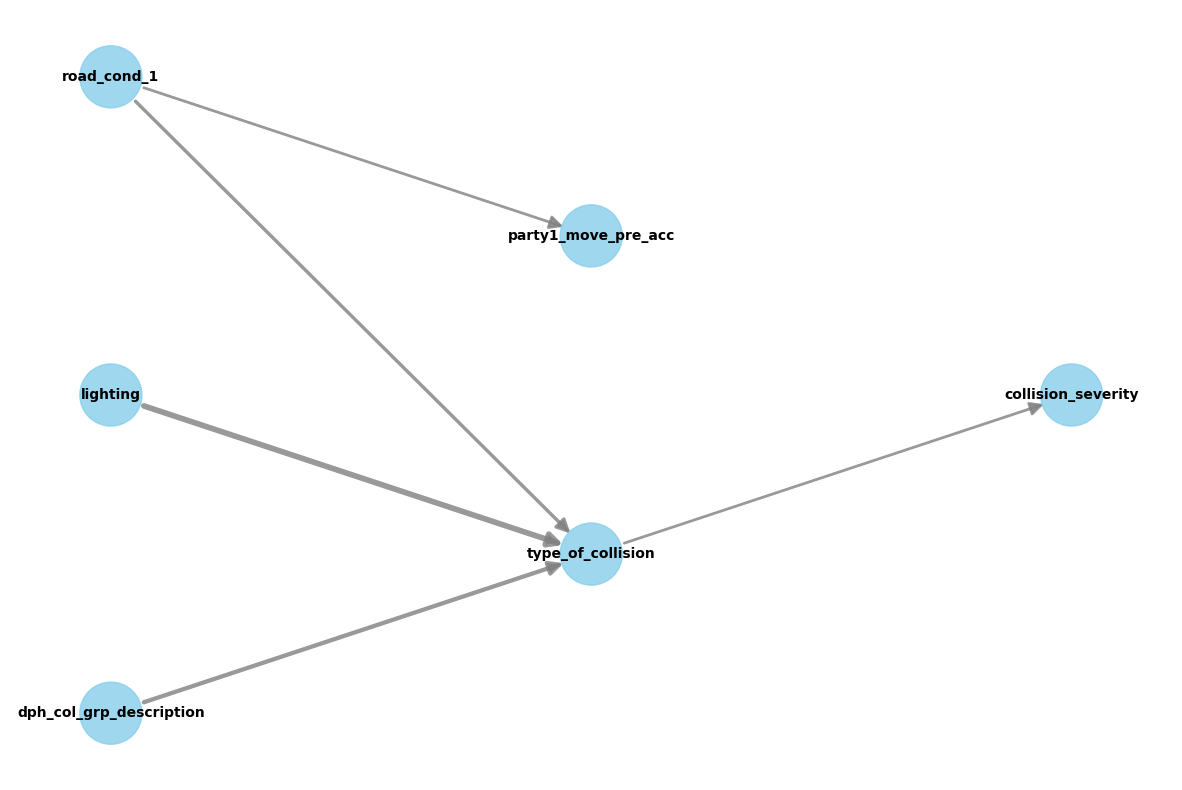

In [ ]:
from dowhy.utils import plot

plot(graph,
     causal_strengths=convert_to_percentage(arrow_strengths),
     figure_size=[15, 10])